### This notebook is a guide for converting the data lableled in DeepPoseKit to the DeepLabCut (DLC) labeled data Format 
Example of DLC labeled data format can be found on (https://github.com/DeepLabCut/DeepLabCut/blob/master/examples/openfield-Pranav-2018-10-30/labeled-data/m4s1/CollectedData_Pranav.csv)
Here, we are converting data annotated in DeepPoseKit (DPK) stored in .h5 format (https://github.com/jgraving/DeepPoseKit-Data/tree/master/datasets/zebra) 

### Step 1: Create DeepLabCut project 
- Create a new project (see https://github.com/DeepLabCut/DeepLabCut/blob/master/README.md)
- Include atleast one video during project creation.It need not be an actual video. 
- Any video would work as the purpose here is for DLC to automatically create a directory of the same name under the "labeled-data" folder
- In this example deeplabcut project is created under title "DLCproject" with a video named "Zebra_Demo", and the name of the experimenter/scorer as "Experimenter"

### Step 2: convert files

In [1]:
# Import required libraries
import h5py
import sys
import io
import glob
import cv2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import csv 
import itertools

In [2]:
# Import the h5 file containing labeled data from DeepPoseKit
dpk_file = "Path to DPK h5 file location"
raw_file = h5py.File(dpk_file, 'r')

# Check the contents of the file (different keys)
print(list(raw_file.keys()))

# Check the number of annotations is right
print(f"There are {len(raw_file['annotations'])} annotations.")

# If everything is okay in the h5 file, we can move to data conversion

['annotated', 'annotations', 'images', 'skeleton']
There are 2140 annotations.


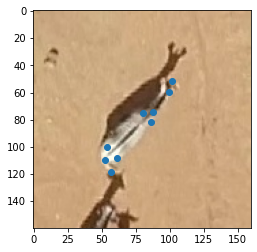

In [3]:
# Check the images and corresponding annotations for different annotation numbers
annotation_number = 1050   #check with 2-3 random annotation numbers in the range
plt.imshow(raw_file['images'][annotation_number][...,::-1])
annotation = raw_file['annotations'][annotation_number]
plt.scatter(annotation[:,0], annotation[:,1])

In [4]:
# Define paths and files of the DLC project created
dlc_project = "Full Path to DLCproject folder"
dlc_config_file = os.path.join(dlc_project, "config.yaml")
dlc_video_file_name = "Name of the video file"
dlc_labeled_data = os.path.join(dlc_project, "labeled-data",dlc_video_file_name) 

In [5]:
# Step 2: Convert the data

# Export the images from h5 format in PNG format with index as a file name to the "dlc_labeled_data"
# You can skip this step if you already or can copy have labeled images externally in the directory
img = np.array(raw_file['images'])

for i, image in enumerate(img):
    cv2.imwrite(os.path.join(dlc_labeled_data, 'image_'+ str(i) +'.png'),image)

In [ ]:
# Convert annotations to a Numpy array (In DPK it is a 3d array)
labels_3d = list(raw_file['annotations'])
labels_3d = np.array(labels_3d)
print(labels_3d.shape)

# Reshape file from 3d to 2d array 
labels_2d = labels_3d.reshape(labels_3d.shape[0], -1)
print(labels_2d[:5])

# Convert 2D array to Datframe 
zebra_labels_2d = pd.DataFrame(labels_2d)
print(zebra_labels_2d.shape)

# This dataframe should have Rows= number of annotated images & Columns = (2* number of body parts)

(2140, 9, 2)
[[115.81567572  94.06106529 112.92746943  89.78342122 102.13769819
   80.          98.23137603  75.03076508  95.55882972  81.69061246
   61.92477273  75.25746929  62.89786506  82.66170763  57.86230181
   80.          54.44209946  81.9344822 ]
 [132.04124871  81.42917118 127.62568916  80.25322072 106.82629744
   80.          98.64762178  75.8118061  101.76058095  85.51653546
   59.76993808  74.70667373  57.87030982  84.82289551  53.17370256
   80.          50.49327817  70.75975331]
 [116.04436461  75.13074471 113.46482368  76.85874167 100.08108441
   80.          95.43293006  76.05200648  96.08110332  82.864984
   64.85709421  75.79942582  65.23854843  84.08184922  59.91891559
   80.          57.49952225  74.75685845]
 [124.69977144  75.00310056 120.48612622  79.3173242  104.15110082
   80.          97.52378292  76.5249888   95.59662904  83.73197713
   64.53003683  73.59006437  63.16203743  85.35116878  55.84889918
   80.          47.81975164  82.08277386]
 [117.26016497  7

In [ ]:
# Get the list of paths for each PNG image stored earlier
image_files = os.listdir(dlc_labeled_data)

# Critical point: Sort the files by name (integer in the filename) 
image_files.sort(key=lambda x: int(os.path.basename(x).split('.')[0][6:]))

# store list of path for evey image in a list
paths_list= []
for i in image_files:
    full_path = os.path.join("labeled-data\\", dlc_video_file_name, i)
    paths_list.append(full_path)
# Convert the list to a dataframe
paths_list_df = pd.DataFrame(paths_list)
    
# Merge the 'paths_list'  as a first column pf 'Zebra_labels2D' Dataframe
# Here is, it is assumed that the annotations in 'Zebra_labels2D' are sorted by image number/name, i.e. row-index '0' corresponds to annotations of image_0
zebra_labels = pd.concat([paths_list_df, zebra_labels_2d], axis=1, ignore_index=True)

# Check if everything is okay
print(zebra_labels.shape)
zebra_labels[:5]

(2140, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,labeled-data\Zebra_Demo\image_0.png,115.815676,94.061065,112.927469,89.783421,102.137698,80.0,98.231376,75.030765,95.558830,81.690612,61.924773,75.257469,62.897865,82.661708,57.862302,80.0,54.442099,81.934482
1,labeled-data\Zebra_Demo\image_1.png,132.041249,81.429171,127.625689,80.253221,106.826297,80.0,98.647622,75.811806,101.760581,85.516535,59.769938,74.706674,57.870310,84.822896,53.173703,80.0,50.493278,70.759753
2,labeled-data\Zebra_Demo\image_2.png,116.044365,75.130745,113.464824,76.858742,100.081084,80.0,95.432930,76.052006,96.081103,82.864984,64.857094,75.799426,65.238548,84.081849,59.918916,80.0,57.499522,74.756858
3,labeled-data\Zebra_Demo\image_3.png,124.699771,75.003101,120.486126,79.317324,104.151101,80.0,97.523783,76.524989,95.596629,83.731977,64.530037,73.590064,63.162037,85.351169,55.848899,80.0,47.819752,82.082774
4,labeled-data\Zebra_Demo\image_4.png,117.260165,71.175815,115.665754,74.000898,101.743534,80.0,96.468771,77.133489,98.556268,83.771857,63.590284,76.319347,63.119044,83.778485,58.256466,80.0,56.216762,80.499203


In [8]:
# Createtop three rows as per DLC format 

# Create row 1 with the scorer's name. It should be exactly the same as your DLCproject scorer/ experimenter name (here, the experimenter is "Experimenter"). 
# Repeat the scorer name for  2*number of body parts times (in this case, 9*2 =18). Insert "scorer" as the first item
row_1 = ["Experimenter"]*18
row_1.insert(0,"scorer")

# Insert row 2 with all the body parts names (twice) and the append "bodyparts" as the first item  
# Critical Point: The order and the text of the body part names should be exactly the same as the order of annotations 
#, i.e. annotations in the columns with indexes 1 & 2 in the dataframe created above should correspond to the x & y coordinates of the annotations of the first body part in the ‘body_parts’ list (here, it is "snout")
body_parts = ["snout","head","neck","forelegL1","forelegR1","hindlegL1","hindlegR1","tailbase","tailtip"]
row_2 = [x for item in body_parts for x in itertools.repeat(item, 2)]
row_2.insert(0,"bodyparts")

# Insert row 3 with coordinates axes = (x,y)* number of body parts;
# Append "coords" as the first item 
row_3 = ["x","y"]*9
row_3.insert(0,"coords")
row_3

# Create a dataframe by stacking the three rows 
header_rows = pd.DataFrame(list(zip(row_1,row_2,row_3))).transpose()

# Create final data frame in DLC format by stacking header rows and annotations together
dlc_format_labels = pd.concat([header_rows,zebra_labels], axis=0)
dlc_format_labels[:5]

# Write a Dataframe to a CSV file in the labeled-data directory without index and header
# Critical point: name the CSV file in "CollectedData_scorer.csv" format (here, the scorer is "Experimenter")
csv_file_name = os.path.join(dlc_labeled_data, f"CollectedData_Experimenter.csv")
dlc_format_labels.to_csv(csv_file_name, index = False, header= False)


In [ ]:
# Convert the CSV file into .h5 format of deeplabcut using function provided inside deeplabcut
import deeplabcut
deeplabcut.convertcsv2h5(dlc_config_file, scorer= 'Experimenter')

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


C:\Users\Adwait\anaconda3\envs\DeepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Adwait\anaconda3\envs\DeepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Do you want to convert the csv file in folder: F:\Post Doc\zebra_posture\Zebra_Data\DLCproject-Experimenter-2022-03-30\labeled-data\Zebra_Demo ?


yes/no yes


### Step 3: Edit config.yaml file (in DeepLabCut)
Critical point: Open the config.yaml file in any text editor to change the 'bodyparts'

List all the body parts in the same order as "body_parts" list created earlier. 
 
Order of body parts should be the same in config.yaml in the Dlcproject folder, the "body_parts" list created in this notebook and the annotation order of every image

### Using DeepLabCut

Once all the steps are completed in the given order, you can proceed directly to creating a training dataset and training the network in deeplabcut by launching deeplabcut GUI and loading the DLCproject

You can find deeplabcut tutorial on the following link (https://deeplabcut.github.io/DeepLabCut/docs/standardDeepLabCut_UserGuide.html) 

Alternatively, You can also migrate/ copy the DLCproject folder to Google drive for creating a training dataset and training the network using Google Colab

DLC-Colab demo notebook is available on the following link (https://colab.research.google.com/github/DeepLabCut/DeepLabCut-core/blob/tf2.2alpha/Colab_TrainNetwork_VideoAnalysis_TF2.ipynb)

Note that you need to change the paths to your google drive DLCproject folder in the config file to work on Colab.